<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/NLP_USING_TENSORFLOW/sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
sarcasm_json = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')
sentences = []
labels = []
urls = []
for item in sarcasm_json.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [3]:
print(len(sentences))

26709


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
#defining the hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_token = "<OOV>"
training_size = 20000

In [0]:
import numpy as np
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index 

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)


In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             
          ])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5560 - accuracy: 0.7111 - val_loss: 0.3906 - val_accuracy: 0.8343
Epoch 2/30
625/625 - 2s - loss: 0.3030 - accuracy: 0.8778 - val_loss: 0.3382 - val_accuracy: 0.8575
Epoch 3/30
625/625 - 2s - loss: 0.2256 - accuracy: 0.9111 - val_loss: 0.3442 - val_accuracy: 0.8566
Epoch 4/30
625/625 - 2s - loss: 0.1809 - accuracy: 0.9306 - val_loss: 0.3822 - val_accuracy: 0.8487
Epoch 5/30
625/625 - 2s - loss: 0.1496 - accuracy: 0.9453 - val_loss: 0.4027 - val_accuracy: 0.8463
Epoch 6/30
625/625 - 2s - loss: 0.1266 - accuracy: 0.9537 - val_loss: 0.4430 - val_accuracy: 0.8425
Epoch 7/30
625/625 - 2s - loss: 0.1070 - accuracy: 0.9632 - val_loss: 0.4831 - val_accuracy: 0.8419
Epoch 8/30
625/625 - 2s - loss: 0.0931 - accuracy: 0.9681 - val_loss: 0.5310 - val_accuracy: 0.8372
Epoch 9/30
625/625 - 2s - loss: 0.0797 - accuracy: 0.9727 - val_loss: 0.5743 - val_accuracy: 0.8353
Epoch 10/30
625/625 - 2s - loss: 0.0686 - accuracy: 0.9777 - val_loss: 0.6262 - val_accuracy: 0.8286

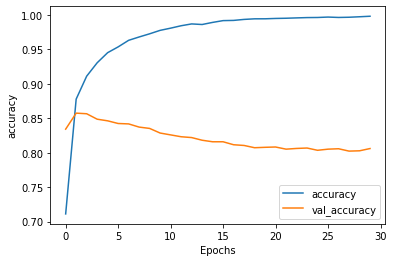

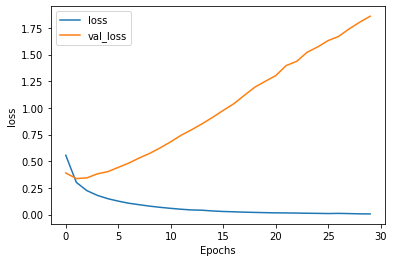

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")